### Homework
    modify the code below by replacinf the fitness function.
    You can choose one of two fitness functions, please indicate which one you work on
    Option a:
    Instead of doing NK, the sum of the numbers in the genome define fitness
    This is rather easy, so once that is done, explore how large genomes (N~20, ~40, ~100)
    perform in this environment
    Option b:
    Make the checkerboard fitness function. There you count how many numbers in the genome
    sequence are identical. If the number flips you get rewarded if the next sequence of numbers
    is as long as the first. Example:
    Genome: 1100110011
    Length   2 2 2 2 2
    Fitness 10
    
    Genome: 1010110110
    Length  1 1 1 1 2 1 2 1
    Fitness 4 (the first four ones are summed then the sequence has none matching lengths)
    
    It becomes interesting to see what the diversity of solutions looks like

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from pandas import *
import random

In [9]:
def makeNKTable(N,K):
    NKTable=list()
    for n in list(range(N)):
        L=list()
        for i in range(2**K):
            L.append(round(random.uniform(0.0,1.0),2))
        NKTable.append(L)
    return NKTable

print (makeNKTable(5,2))


[[0.56, 0.58, 0.15, 0.19], [0.22, 0.63, 0.05, 0.99], [0.07, 0.46, 0.01, 0.54], [0.3, 0.78, 0.62, 0.64], [0.16, 0.39, 0.83, 0.29]]


In [11]:
def makePopulation(N,popSize):
    population=list()
    for p in range(popSize):
        genome=list()
        for n in list(range(N)):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print (makePopulation(5,10))

[[0, 1, 1, 0, 1], [1, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 0, 1, 1], [0, 0, 0, 1, 1], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 1]]


In [14]:
def computeFitness(genome): #sums numbers for fitness relative to others
    fitness=sum(genome)/float(len(genome)) #different genome sizes
    return fitness

print (computeFitness([1,0,1,0,1,1,0,1,1,0]))

0.6


In [18]:
def makeMutant(genome,mutationRate):
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)

for i in range(10):
    print (makeMutant([0,0,0,0,0],0.3))

[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 1, 0]
[0, 1, 0, 1, 0]


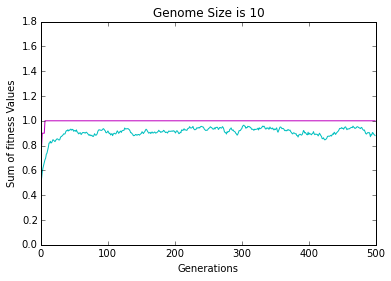

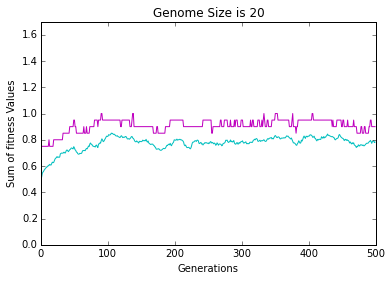

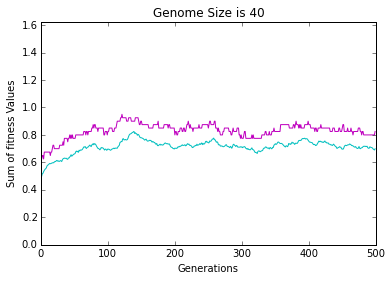

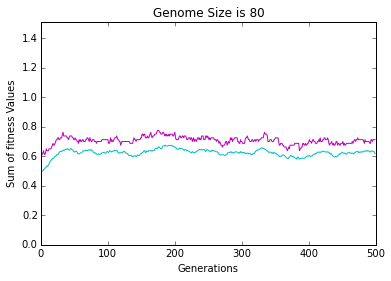

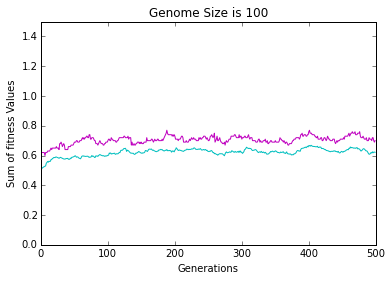

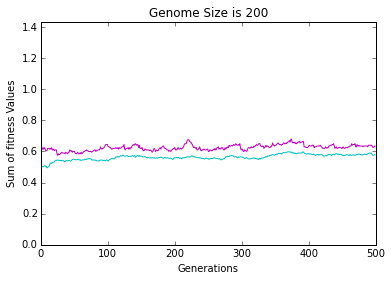

In [21]:
random.seed(0)

changeN=[10,20,40,80,100,200]

for N in changeN:
#create a population
    popSize=100
    population=makePopulation(N,popSize)
    currentNKTable=makeNKTable(N,K)
    generations=500
    mutationRate=0.01

    meanW=list()
    maxW=list()
    
    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i]))
    
    
        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)
    
        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)

    figure()
    title("Genome Size is {0}".format(N))
    plot(meanW,'c')
    plot(maxW,'m')
    ylim(0,highestFitness+0.8)
    xlabel("Generations")
    ylabel("Sum of fitness Values")

In [35]:
print W

[0.3630231015222976, 0.32717375182924685, 0.0, 0.21445422618829915, 0.28902517136268197]


In [36]:
print population

[[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,